In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Generamos un dataset random

In [19]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate the independent variable (X)
X = np.linspace(1, 20, 20)

# Define the true relationship between X and Y
true_slope = 1.4
true_intercept = 1.5

# Generate the dependent variable (Y) with some noise
noise = np.random.normal(0, 1, X.shape)
Y = true_slope * X + true_intercept + noise

# Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Save the dataset to a CSV file
data.to_csv('linear_regression_data.csv', index=False)

data


,X,Y
0,1.0,3.396714
1,2.0,4.161736
2,3.0,6.347689
3,4.0,8.623030
4,5.0,8.265847
5,6.0,9.665863
6,7.0,12.879213
7,8.0,13.467435
8,9.0,13.630526
9,10.0,16.042560


## Ploteo de los datos

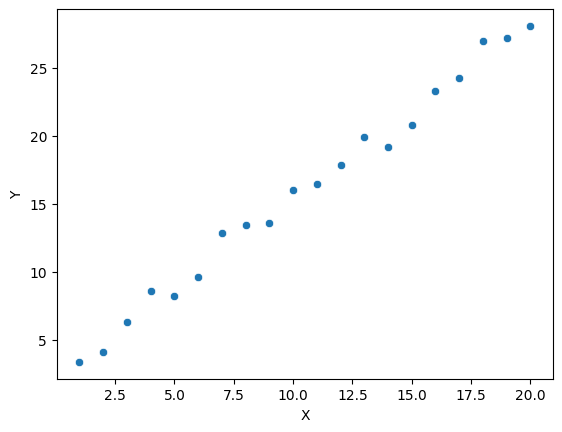

In [20]:
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='X', y='Y', ax=ax)
plt.show()

## Una regresión lineal es un problema de optimización donde buscamos la recta que representa a un conjunto de puntos.

Para ello usamos la librería sklearn.

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linear_model = LinearRegression() #Instanciamos la regresión lineal
print(X.reshape(-1, 1))
linear_model.fit(X.reshape(-1, 1), Y) #Entrenamos el modelo con los datos.
print(linear_model.coef_)


[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]]
[1.30043524]


## Ploteo de la regresión lineal

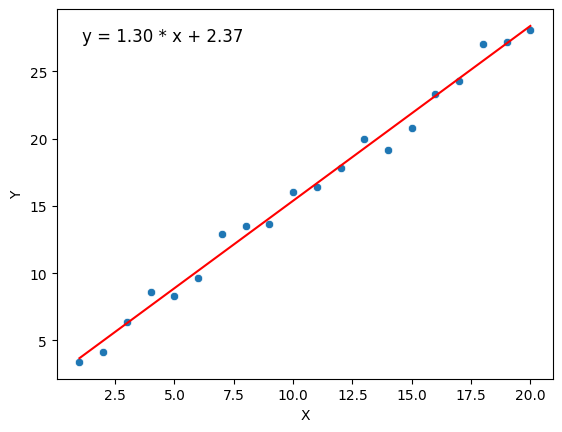

In [23]:
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='X', y='Y', ax=ax)
ax.plot(X, linear_model.coef_ * X + linear_model.intercept_, color='red')

# Add the equation of the line as a legend
equation = f"y = {linear_model.coef_[0]:.2f} * x + {linear_model.intercept_:.2f}"
ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=12, verticalalignment='top')

plt.show()

In [24]:
print(linear_model.coef_[0])
print(linear_model.intercept_)


1.3004352426278714
2.3741313909655197


## Ahora hagamos una regresión lineal desde cero usando Numpy

Como dije previamente, una regresión lineal es un problema de optimización conocido como el problema de los mínimos cuadrados (Es un caso particular de este). 

Dada la ecuación $y = \beta_0 + \beta_1x $ y n puntos de la forma $(x_i,y_i)$, tenemos que la matriz representante del sistema de ecuaciones cuadráticas está dada por:

$$
\left(\begin{array}{cc}
1 & x_1 \\
\vdots & \vdots \\
1 & x_n 
\end{array}\right)
\left(\begin{array}{cc}
\beta_0\\
\beta_1\\
\end{array}\right)
=
\left(\begin{array}{cc}
y_0\\
\vdots\\
y_n
\end{array}\right)
$$

$$\leftrightarrow   \beta_{a}  = (X^t X)^{-1} X^t y$$

In [26]:
# Define the independent variables (X)
X = data.X

# Define the dependent variable (Y)
Y = data.Y

# Add a column of ones to X for the intercept term
X = np.column_stack((np.ones(len(X)), X))

print(X)

# Calculamos los coeficientes
coefficients = np.linalg.inv(X.T @ X) @ X.T @ Y

# Print the coefficients
print(coefficients)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]]
[2.37413139 1.30043524]


https://organized-curiosity.medium.com/linear-regression-a-simple-introduction-to-machine-learning-10f1799baf37